In [545]:
#import packages
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Additionally, ridge and lasso may be quicker and more easily interpreted (look at the coefficients and make sure you discuss this)

# 1. Data Preparation

## Import data

In [563]:
#load dataframe
df = pd.read_pickle('album_df.pkl')


In [558]:
df.head()

,album_run_time_ms,number_of_tracks,std_in_energy,std_in_popularity,std_in_danceability,std_in_tempo,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,time_signature_amax,popularity_amax,Score_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax,genres
007DWn799UWvfY1wwZeENR,3065169.0,15.0,0.072424,8.115241,0.061874,30.605883,0.871667,0.046364,0.000119,-7.147600,126.265133,0.695,0.454,0.5510,0.963,173.368,4,80.0,7.8,79,True,1.0,10.0,Rap
00ojDEHvnEOPOjhHrUrKy5,2886000.0,10.0,0.185253,1.433721,0.113543,17.959151,0.724300,0.374767,0.532800,-15.015700,100.700800,0.697,0.896,0.1460,0.874,120.006,4,7.0,7.4,79,False,1.0,11.0,Electronic
00oz3t7cI3WfwS2oEIZD6x,1670290.0,9.0,0.073569,4.898979,0.119798,47.645516,0.443889,0.957778,0.205918,-13.239333,118.242111,0.268,0.161,0.0512,0.342,207.893,5,45.0,8.4,1,False,1.0,11.0,Folk/Country
00uqjqwLruO346z3cNlNqG,2337540.0,13.0,0.204683,8.471672,0.108110,33.892371,0.562154,0.464462,0.011059,-6.111769,124.775154,0.911,0.570,0.2120,0.782,203.911,4,66.0,7.4,79,False,1.0,11.0,Pop/R&B
01ey0ETPITd3jiOiztRXzK,2840581.0,16.0,0.141410,0.885061,0.131997,35.961798,0.377625,0.406806,0.049877,-12.121375,105.696000,0.697,0.355,0.0607,0.543,181.821,4,4.0,7.1,79,True,1.0,9.0,ElectronicRock


In [559]:
df.shape

(1604, 24)

## Check for multicolinearity of features

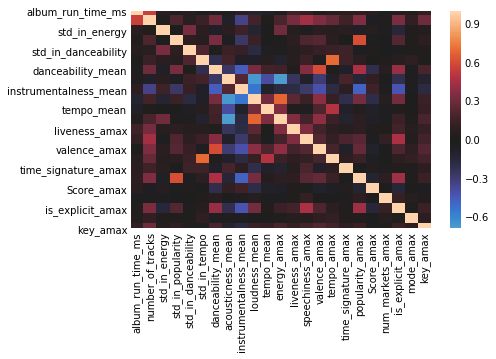

In [560]:
#look at heatmap
sns.heatmap(df.corr(), center=0)

In [561]:
#check for multicoliniar features above 0.75
abs(df.corr()) > 0.75

,album_run_time_ms,number_of_tracks,std_in_energy,std_in_popularity,std_in_danceability,std_in_tempo,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,time_signature_amax,popularity_amax,Score_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax
album_run_time_ms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
number_of_tracks,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
std_in_energy,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
std_in_popularity,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
std_in_danceability,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
std_in_tempo,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
danceability_mean,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
acousticness_mean,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
instrumentalness_mean,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
loudness_mean,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


#### This data set has no multicolinearity above 0.75 threshold

## Deal with categorical features by making dummy variables

In [564]:
#get dummies for categorical features
gen_dummies = pd.get_dummies(df['genres'], prefix='genre', drop_first=True)
explicit_dummies = pd.get_dummies(df['is_explicit_amax'], prefix='explicit', drop_first=True)
mode_dummies = pd.get_dummies(df['mode_amax'], prefix='mode', drop_first=True)
key_dummies = pd.get_dummies(df['key_amax'], prefix='key', drop_first=True)
signature_dummies = pd.get_dummies(df['time_signature_amax'], prefix='signature', drop_first=True)

In [565]:
#create dataframe with no categorical variables
df_no_cat = df.drop(['genres', 'is_explicit_amax', 'mode_amax', 'key_amax', 'time_signature_amax'], axis = 1)

In [566]:
#rename genre column to avoid naming error (/ and &)
gen_dummies.rename(columns={'genre_Folk/Country':'genre_Folk_Country', 'genre_Pop/R&B':'genre_Pop_RnB'}, inplace=True)

In [567]:
#change album run time columns from milliseconds to minutes and rename column
df['album_run_time_ms'] = df['album_run_time_ms'].apply(lambda x: x / 60000)
df.rename(columns={'album_run_time_ms':'album_time_minutes'}, inplace=True)

In [568]:
#create final dataframe with scaled data, dummies, and target
df_fin = pd.concat([df_no_cat, gen_dummies, explicit_dummies, mode_dummies, key_dummies,
                    signature_dummies], axis=1)

In [569]:
df_fin.head()

,album_run_time_ms,number_of_tracks,std_in_energy,std_in_popularity,std_in_danceability,std_in_tempo,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,popularity_amax,Score_amax,num_markets_amax,genre_ElectronicRock,genre_Experimental,genre_ExperimentalElectronic,genre_ExperimentalRock,genre_Folk_Country,genre_Global,genre_Jazz,genre_Metal,genre_Pop_RnB,genre_Rap,genre_Rock,explicit_True,mode_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,signature_4,signature_5
007DWn799UWvfY1wwZeENR,3065169.0,15.0,0.072424,8.115241,0.061874,30.605883,0.871667,0.046364,0.000119,-7.147600,126.265133,0.695,0.454,0.5510,0.963,173.368,80.0,7.8,79,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
00ojDEHvnEOPOjhHrUrKy5,2886000.0,10.0,0.185253,1.433721,0.113543,17.959151,0.724300,0.374767,0.532800,-15.015700,100.700800,0.697,0.896,0.1460,0.874,120.006,7.0,7.4,79,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
00oz3t7cI3WfwS2oEIZD6x,1670290.0,9.0,0.073569,4.898979,0.119798,47.645516,0.443889,0.957778,0.205918,-13.239333,118.242111,0.268,0.161,0.0512,0.342,207.893,45.0,8.4,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
00uqjqwLruO346z3cNlNqG,2337540.0,13.0,0.204683,8.471672,0.108110,33.892371,0.562154,0.464462,0.011059,-6.111769,124.775154,0.911,0.570,0.2120,0.782,203.911,66.0,7.4,79,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
01ey0ETPITd3jiOiztRXzK,2840581.0,16.0,0.141410,0.885061,0.131997,35.961798,0.377625,0.406806,0.049877,-12.121375,105.696000,0.697,0.355,0.0607,0.543,181.821,4.0,7.1,79,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0


# 2. Modeling

## Create a baseline model using mean as the prediction

In [582]:
#assign random feature to X
X = df_fin[['popularity_amax']].values
#assign target variable to y
y = df['Score_amax'].values
#perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)

In [583]:
#instantiate dummy regressor which will always predict the mean of the target
dummy_regr = DummyRegressor(strategy="mean")
#fit training data
dummy_regr.fit(X_train, y_train)
#generate predictions for test data
y_pred_dummy = dummy_regr.predict(X_test)

In [584]:
dummy_regr.score(X_test, y_test)

-2.0689561917475174e-05

In [585]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_dummy))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_dummy))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_dummy)))

Mean Absolute Error: 0.755143100647577
Mean Squared Error: 1.0720589420365523
Root Mean Squared Error: 1.0354027921715068


#### The RMSE of the dummy regressor is 1.04 which will be the evaluation metric to try and bring down.

## Data preparation for further modeling

In [478]:
features = df_fin.drop(['Score_amax'], axis=1)
target = df_fin['Score_amax']

#### Identify data that needs to be scaled or transformed by looking at each feature's distribution

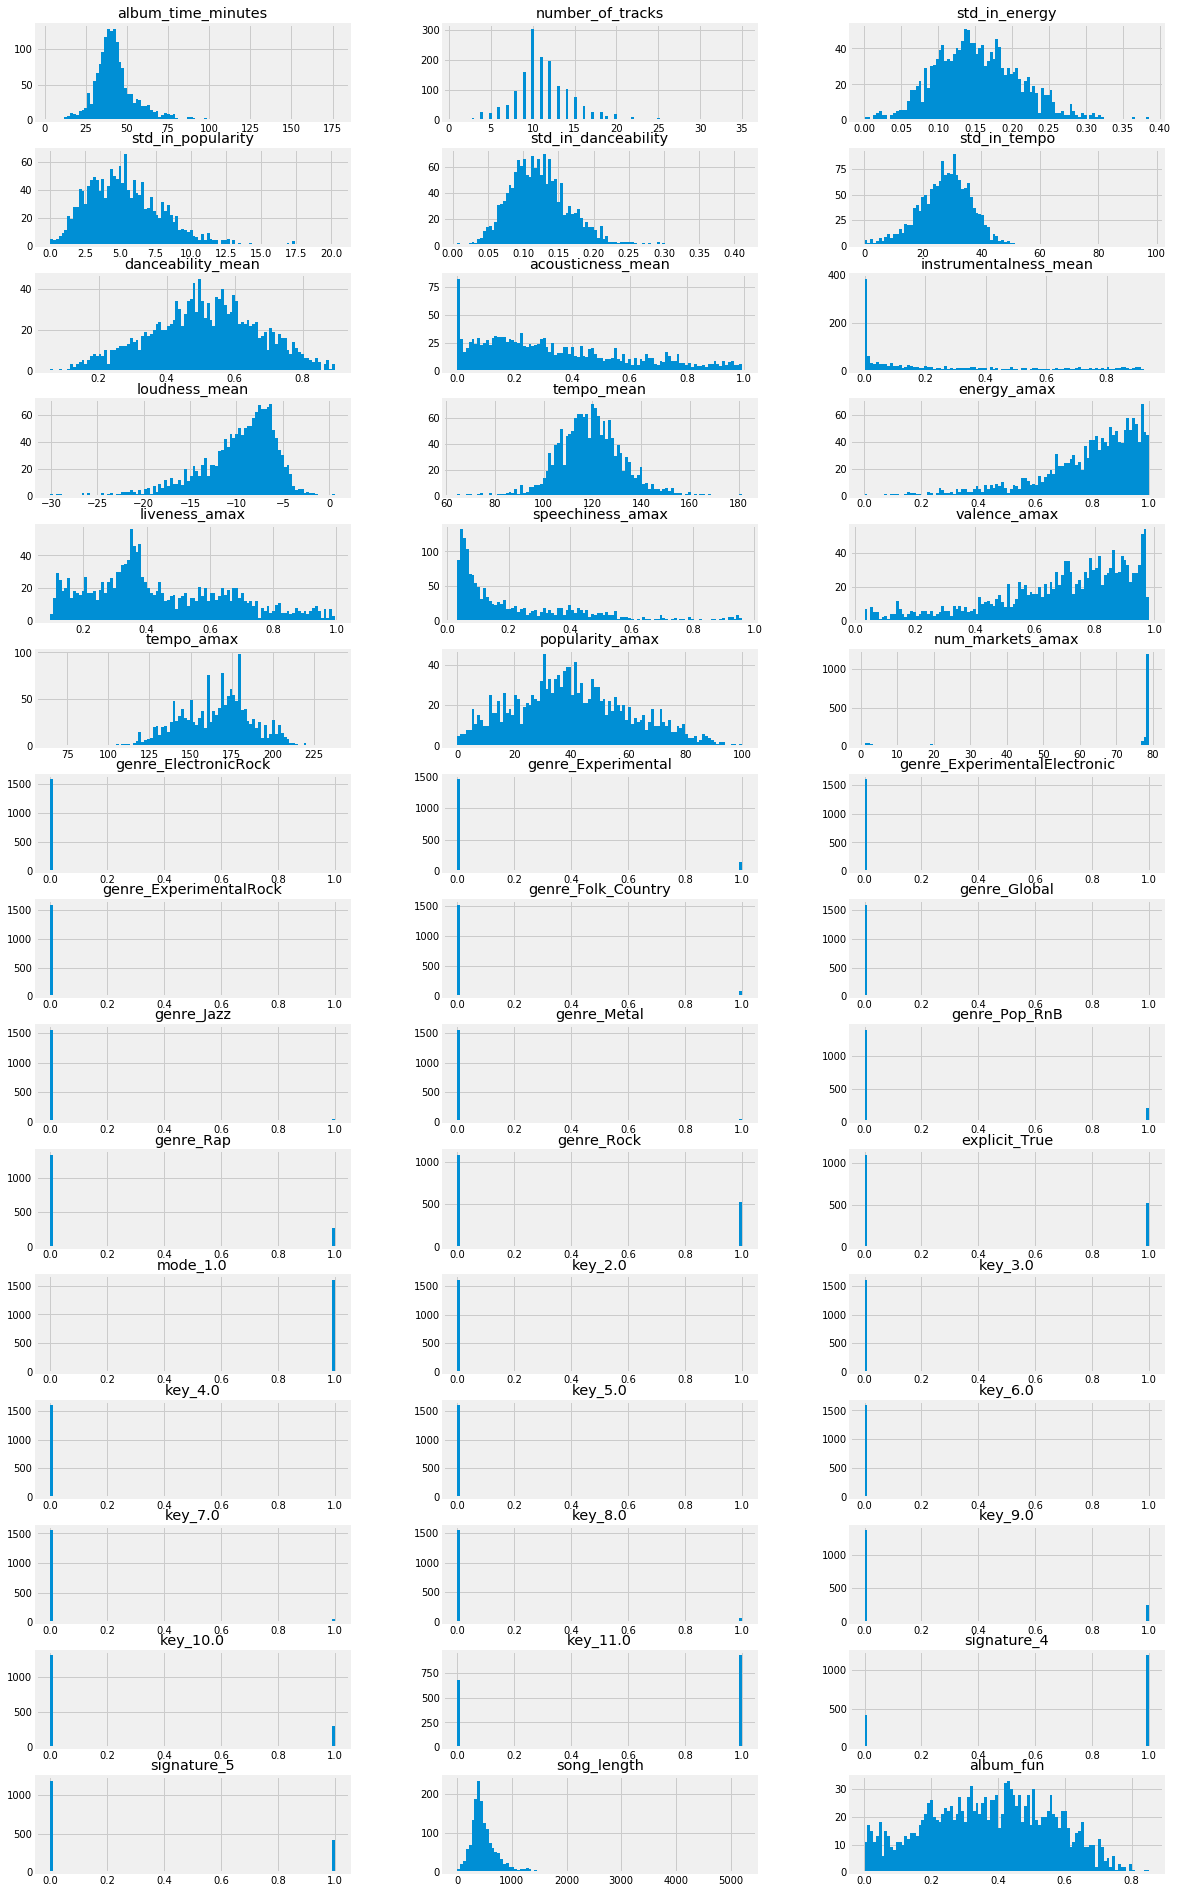

In [480]:
fig, axes = plt.subplots(len(features.columns)//3, 3, figsize=(18, 34))

i = 0
for triaxis in axes:
    for axis in triaxis:
        features.hist(column = features.columns[i], bins = 100, ax=axis)
        i = i+1

In [488]:
transformed_features = features.copy()

# Initialize the scaler
scaler = StandardScaler()

#scale data
cols_to_norm = ['album_time_minutes', 'number_of_tracks','loudness_mean', 'tempo_mean',
                'tempo_amax', 'popularity_amax', 'num_markets_amax', 'song_length', 'std_in_tempo',
                'std_in_danceability', 'std_in_popularity']

# Scale every feature except the binary columns
transformed_features[cols_to_norm] = scaler.fit_transform(features[cols_to_norm])

X_train, X_test, y_train, y_test = train_test_split(transformed_features, target, random_state=20, test_size=0.2)

In [495]:
def run_model(model, X_train, X_test, y_train, y_test):
    
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    print('Training Root Mean Square Error', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    print('Testing Root Mean Square Error', np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [531]:
lm = LinearRegression()
lm.fit(X_train, y_train)
run_model(lm, X_train, X_test, y_train, y_test)

Training R^2 : 0.08939344172797348
Training Root Mean Square Error 0.9397234052905804

----------------

Testing R^2 : 0.07495294468369196
Testing Root Mean Square Error 0.9958335452974054


In [498]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly_train = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names(features.columns))
X_poly_test = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names(features.columns))
X_poly_train.head()

,album_time_minutes,number_of_tracks,std_in_energy,std_in_popularity,std_in_danceability,std_in_tempo,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,popularity_amax,num_markets_amax,genre_ElectronicRock,genre_Experimental,genre_ExperimentalElectronic,genre_ExperimentalRock,genre_Folk_Country,genre_Global,genre_Jazz,genre_Metal,genre_Pop_RnB,genre_Rap,genre_Rock,explicit_True,mode_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,signature_4,signature_5,song_length,album_fun,human,album_time_minutes^2,album_time_minutes number_of_tracks,album_time_minutes std_in_energy,album_time_minutes std_in_popularity,album_time_minutes std_in_danceability,album_time_minutes std_in_tempo,album_time_minutes danceability_mean,album_time_minutes acousticness_mean,album_time_minutes instrumentalness_mean,album_time_minutes loudness_mean,album_time_minutes tempo_mean,album_time_minutes energy_amax,album_time_minutes liveness_amax,album_time_minutes speechiness_amax,album_time_minutes valence_amax,album_time_minutes tempo_amax,album_time_minutes popularity_amax,album_time_minutes num_markets_amax,album_time_minutes genre_ElectronicRock,album_time_minutes genre_Experimental,album_time_minutes genre_ExperimentalElectronic,album_time_minutes genre_ExperimentalRock,album_time_minutes genre_Folk_Country,album_time_minutes genre_Global,album_time_minutes genre_Jazz,album_time_minutes genre_Metal,album_time_minutes genre_Pop_RnB,album_time_minutes genre_Rap,album_time_minutes genre_Rock,album_time_minutes explicit_True,album_time_minutes mode_1.0,album_time_minutes key_2.0,album_time_minutes key_3.0,album_time_minutes key_4.0,album_time_minutes key_5.0,album_time_minutes key_6.0,album_time_minutes key_7.0,album_time_minutes key_8.0,album_time_minutes key_9.0,album_time_minutes key_10.0,album_time_minutes key_11.0,album_time_minutes signature_4,album_time_minutes signature_5,album_time_minutes song_length,album_time_minutes album_fun,album_time_minutes human,number_of_tracks^2,number_of_tracks std_in_energy,number_of_tracks std_in_popularity,number_of_tracks std_in_danceability,number_of_tracks std_in_tempo,number_of_tracks danceability_mean,number_of_tracks acousticness_mean,number_of_tracks instrumentalness_mean,number_of_tracks loudness_mean,number_of_tracks tempo_mean,number_of_tracks energy_amax,number_of_tracks liveness_amax,number_of_tracks speechiness_amax,number_of_tracks valence_amax,number_of_tracks tempo_amax,number_of_tracks popularity_amax,number_of_tracks num_markets_amax,number_of_tracks genre_ElectronicRock,number_of_tracks genre_Experimental,number_of_tracks genre_ExperimentalElectronic,number_of_tracks genre_ExperimentalRock,number_of_tracks genre_Folk_Country,number_of_tracks genre_Global,number_of_tracks genre_Jazz,number_of_tracks genre_Metal,number_of_tracks genre_Pop_RnB,number_of_tracks genre_Rap,number_of_tracks genre_Rock,number_of_tracks explicit_True,number_of_tracks mode_1.0,number_of_tracks key_2.0,number_of_tracks key_3.0,number_of_tracks key_4.0,number_of_tracks key_5.0,number_of_tracks key_6.0,number_of_tracks key_7.0,number_of_tracks key_8.0,number_of_tracks key_9.0,number_of_tracks key_10.0,number_of_tracks key_11.0,number_of_tracks signature_4,number_of_tracks signature_5,number_of_tracks song_length,number_of_tracks album_fun,number_of_tracks human,std_in_energy^2,std_in_energy std_in_popularity,std_in_energy std_in_danceability,std_in_energy std_in_tempo,std_in_energy danceability_mean,std_in_energy acousticness_mean,std_in_energy instrumentalness_mean,std_in_energy loudness_mean,std_in_energy tempo_mean,std_in_energy energy_amax,std_in_energy liveness_amax,std_in_energy speechiness_amax,std_in_energy valence_amax,std_in_energy tempo_amax,std_in_energy popularity_amax,std_in_energy num_markets_amax,std_in_energy genre_ElectronicRock,std_in_energy genre_Experimental,std_in_energy 

In [499]:
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

run_model(lr_poly, X_poly_train, X_poly_test, y_train, y_test)

Training R^2 : 0.5426541756027052
Training Root Mean Square Error 0.6659736037843011

----------------

Testing R^2 : -4.029807253924021
Testing Root Mean Square Error 2.3220978192812427


In [503]:
threshold_ranges = np.linspace(0, 2, num=6)

for thresh in threshold_ranges:
    print(thresh)
    selector = VarianceThreshold(thresh)
    reduced_feature_train = selector.fit_transform(X_poly_train)
    reduced_feature_test = selector.transform(X_poly_test)
    lr = LinearRegression()
    lr.fit(reduced_feature_train, y_train)
    run_model(lr, reduced_feature_train, reduced_feature_test, y_train, y_test)
    print('--------------------------------------------------------------------')

0.0
Training R^2 : 0.5426541756027052
Training Root Mean Square Error 0.6659736037843011

----------------

Testing R^2 : -4.029807253926245
Testing Root Mean Square Error 2.322097819281756
--------------------------------------------------------------------
0.4
Training R^2 : 0.18153620110265445
Training Root Mean Square Error 0.8909111502694103

----------------

Testing R^2 : -6.850592525230518e+20
Testing Root Mean Square Error 27099976068.216057
--------------------------------------------------------------------
0.8
Training R^2 : 0.13307009281225668
Training Root Mean Square Error 0.9169098740122961

----------------

Testing R^2 : -1.0137579081936254e+21
Testing Root Mean Square Error 32966433616.912148
--------------------------------------------------------------------
1.2000000000000002
Training R^2 : 0.05411031810391632
Training Root Mean Square Error 0.9577560430798869

----------------

Testing R^2 : -0.24054684845220797
Testing Root Mean Square Error 1.153218030818705
--

In [505]:
selector = SelectKBest(score_func=f_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test= selector.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_k_best_train ,y_train)
run_model(lr,X_k_best_train,X_k_best_test,y_train,y_test)

Training R^2 : 0.07663588974928204
Training Root Mean Square Error 0.9462832482057909

----------------

Testing R^2 : 0.07975604653919055
Testing Root Mean Square Error 0.9932448581183593


In [506]:
selector = SelectKBest(score_func=mutual_info_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test= selector.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_k_best_train ,y_train)
run_model(lr,X_k_best_train,X_k_best_test,y_train,y_test)

Training R^2 : 0.02071813061458816
Training Root Mean Square Error 0.9745149676245961

----------------

Testing R^2 : 0.02346185806933965
Testing Root Mean Square Error 1.0231738795087024


In [508]:
rfe = RFECV(LinearRegression(),cv=5)
X_rfe_train = rfe.fit_transform(X_poly_train, y_train)
X_rfe_test = rfe.transform(X_poly_test)
lm = LinearRegression().fit(X_rfe_train, y_train)
run_model(lm, X_rfe_train, X_rfe_test, y_train, y_test)
print ('The optimal number of features is: ', rfe.n_features_)

Training R^2 : 0.022020133554083166
Training Root Mean Square Error 0.9738669195943764

----------------

Testing R^2 : 0.0307945475767295
Testing Root Mean Square Error 1.019325205708244
The optimal number of features is:  7


In [511]:
lasso = LassoCV(max_iter=100000, cv=5)
lasso.fit(X_train, y_train)
run_model(lasso,X_train, X_test, y_train, y_test)
print('The optimal alpha for the Lasso Regression is: ', lasso.alpha_)

Training R^2 : 0.06568834179491867
Training Root Mean Square Error 0.9518763592597371

----------------

Testing R^2 : 0.058865420570175964
Testing Root Mean Square Error 1.0044555078249635
The optimal alpha for the Lasso Regression is:  0.009061662613772491


In [512]:
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
run_model(ridge,X_train, X_test, y_train, y_test)
print('The optimal alpha for the Ridge Regression is: ', ridge.alpha_)

Training R^2 : 0.08281009872676193
Training Root Mean Square Error 0.9431142111927923

----------------

Testing R^2 : 0.074841834410315
Testing Root Mean Square Error 0.9958933498308455
The optimal alpha for the Ridge Regression is:  10.0


In [513]:
lasso2 = LassoCV(max_iter=100000, cv=5)

lasso2.fit(X_poly_train, y_train)
run_model(lasso2, X_poly_train, X_poly_test, y_train, y_test)
print('The optimal alpha for the Lasso Regression is: ', lasso2.alpha_)

Training R^2 : 0.07266073863460876
Training Root Mean Square Error 0.9483179705033903

----------------

Testing R^2 : 0.06245124658479029
Testing Root Mean Square Error 1.0025401387923916
The optimal alpha for the Lasso Regression is:  0.03494623853168894


In [526]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

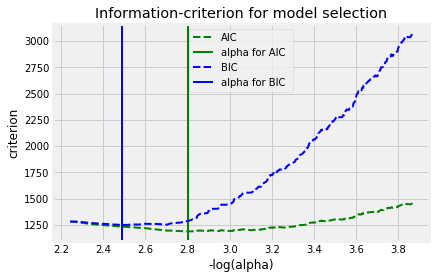

In [527]:
model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X_poly_train, y_train)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_poly_train, y_train)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color, linewidth=2, label= name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=2,
                label='alpha for %s ' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'green')
plot_ic_criterion(model_bic, 'BIC', 'blue')
plt.legend()
plt.title('Information-criterion for model selection');

In [542]:
#best model
lasso = Lasso(alpha= model_aic.alpha_) 
lasso.fit(X_train, y_train)

# Print R2 and MSE
print('Training r^2:', lasso.score(X_train, y_train))
print('Test r^2:', lasso.score(X_test, y_test))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, lasso.predict(X_train))))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

Training r^2: 0.08338614782037246
Test r^2: 0.07837725351496294
Training RMSE: 0.9428179991348976
Test RMSE: 0.9939886644161549


In [536]:
# Code for lasso with alpha from BIC
lasso = Lasso(alpha= model_bic.alpha_) 
lasso.fit(X_train, y_train)

# Print R2 and MSE
print('Training r^2:', lasso.score(X_train, y_train))
print('Test r^2:', lasso.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Test MSE:', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

Training r^2: 0.07931922067904285
Test r^2: 0.0742002677294763
Training MSE: 0.8928497685914208
Test MSE: 0.9962385995857008


In [540]:
# Code for ridge with alpha from BIC
ridge3 = Ridge(alpha= model_bic.alpha_) 
ridge3.fit(X_train, y_train)

# Print R2 and MSE
print('Training r^2:', ridge3.score(X_train, y_train))
print('Test r^2:', ridge3.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge3.predict(X_train)))
print('Test MSE:', np.sqrt(mean_squared_error(y_test, ridge3.predict(X_test))))

Training r^2: 0.08939336788997887
Test r^2: 0.07499410254575223
Training MSE: 0.8830801500568901
Test MSE: 0.9958113913781178


In [ ]:
df_fin = pd.concat([box_data_df, gen_dummies, explicit_dummies, mode_dummies, key_dummies,
                    signature_dummies], axis=1)

In [313]:
#scale data
cols_to_norm = ['album_time_minutes', 'number_of_tracks','loudness_mean', 'tempo_mean',
                'tempo_amax', 'popularity_amax', 'num_markets_amax', 'song_length', 'std_in_tempo',
                'std_in_danceability', 'std_in_popularity']
# scale the data attributes
df_no_categorical[cols_to_norm] = normalize(df_no_categorical[cols_to_norm])

In [314]:
df_no_categorical

,album_time_minutes,number_of_tracks,std_in_energy,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,popularity_amax,num_markets_amax,Score_amax
007DWn799UWvfY1wwZeENR,0.205955,0.060473,0.072424,0.871667,0.046364,0.000119,-0.028816,0.509042,0.695,0.454,0.5510,0.963,0.698938,0.322522,0.318491,7.8
00ojDEHvnEOPOjhHrUrKy5,0.262912,0.054659,0.185253,0.724300,0.374767,0.532800,-0.082075,0.550424,0.697,0.896,0.1460,0.874,0.655945,0.038262,0.431809,7.4
00oz3t7cI3WfwS2oEIZD6x,0.113405,0.036664,0.073569,0.443889,0.957778,0.205918,-0.053934,0.481687,0.268,0.161,0.0512,0.342,0.846901,0.183318,0.004074,8.4
00uqjqwLruO346z3cNlNqG,0.147812,0.049323,0.204683,0.562154,0.464462,0.011059,-0.023188,0.473402,0.911,0.570,0.2120,0.782,0.773647,0.250407,0.299729,7.4
01ey0ETPITd3jiOiztRXzK,0.205390,0.069413,0.141410,0.377625,0.406806,0.049877,-0.052587,0.458544,0.697,0.355,0.0607,0.543,0.788800,0.017353,0.342728,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7z4GhRfLqfSkqrj5F3Yt2B,0.150645,0.049501,0.155841,0.668917,0.324834,0.027416,-0.027570,0.533210,0.789,0.603,0.1730,0.713,0.672170,0.363005,0.325880,6.1
7zIABwRfxyMXWDEaLm89HG,0.215930,0.072563,0.157263,0.354071,0.343600,0.319827,-0.072422,0.577348,0.732,0.574,0.5000,0.477,0.724600,0.108844,0.269518,7.5
7zQuYvRVyQxgIlxhcSLTdW,0.175010,0.070323,0.194170,0.497878,0.156500,0.029083,-0.019996,0.504608,0.925,0.380,0.0663,0.886,0.780850,0.066416,0.308640,7.8
7zeCZY6rQRufc8IHGKyXGX,0.222152,0.049303,0.137279,0.503091,0.052232,0.182373,-0.020928,0.518017,0.975,0.302,0.0647,0.894,0.690537,0.277888,0.354083,1.6


In [329]:
#what needs to be log transformed
box_data = df_no_categorical.drop(['Score_amax', 'loudness_mean'], axis=1)

In [317]:
box_data

,album_time_minutes,number_of_tracks,std_in_energy,danceability_mean,acousticness_mean,instrumentalness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,popularity_amax,num_markets_amax
007DWn799UWvfY1wwZeENR,0.205955,0.060473,0.072424,0.871667,0.046364,0.000119,0.509042,0.695,0.454,0.5510,0.963,0.698938,0.322522,0.318491
00ojDEHvnEOPOjhHrUrKy5,0.262912,0.054659,0.185253,0.724300,0.374767,0.532800,0.550424,0.697,0.896,0.1460,0.874,0.655945,0.038262,0.431809
00oz3t7cI3WfwS2oEIZD6x,0.113405,0.036664,0.073569,0.443889,0.957778,0.205918,0.481687,0.268,0.161,0.0512,0.342,0.846901,0.183318,0.004074
00uqjqwLruO346z3cNlNqG,0.147812,0.049323,0.204683,0.562154,0.464462,0.011059,0.473402,0.911,0.570,0.2120,0.782,0.773647,0.250407,0.299729
01ey0ETPITd3jiOiztRXzK,0.205390,0.069413,0.141410,0.377625,0.406806,0.049877,0.458544,0.697,0.355,0.0607,0.543,0.788800,0.017353,0.342728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7z4GhRfLqfSkqrj5F3Yt2B,0.150645,0.049501,0.155841,0.668917,0.324834,0.027416,0.533210,0.789,0.603,0.1730,0.713,0.672170,0.363005,0.325880
7zIABwRfxyMXWDEaLm89HG,0.215930,0.072563,0.157263,0.354071,0.343600,0.319827,0.577348,0.732,0.574,0.5000,0.477,0.724600,0.108844,0.269518
7zQuYvRVyQxgIlxhcSLTdW,0.175010,0.070323,0.194170,0.497878,0.156500,0.029083,0.504608,0.925,0.380,0.0663,0.886,0.780850,0.066416,0.308640
7zeCZY6rQRufc8IHGKyXGX,0.222152,0.049303,0.137279,0.503091,0.052232,0.182373,0.518017,0.975,0.302,0.0647,0.894,0.690537,0.277888,0.354083


In [318]:
box_data.fillna(method = 'ffill', inplace=True)

In [330]:
posdata = box_data[box_data != 0]

,album_time_minutes,number_of_tracks,std_in_energy,danceability_mean,acousticness_mean,instrumentalness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,popularity_amax,num_markets_amax
007DWn799UWvfY1wwZeENR,51.086150,15.0,0.072424,0.871667,0.046364,0.000119,126.265133,0.695,0.454,0.5510,0.963,173.368,80.0,79
00ojDEHvnEOPOjhHrUrKy5,48.100000,10.0,0.185253,0.724300,0.374767,0.532800,100.700800,0.697,0.896,0.1460,0.874,120.006,7.0,79
00oz3t7cI3WfwS2oEIZD6x,27.838167,9.0,0.073569,0.443889,0.957778,0.205918,118.242111,0.268,0.161,0.0512,0.342,207.893,45.0,1
00uqjqwLruO346z3cNlNqG,38.959000,13.0,0.204683,0.562154,0.464462,0.011059,124.775154,0.911,0.570,0.2120,0.782,203.911,66.0,79
01ey0ETPITd3jiOiztRXzK,47.343017,16.0,0.141410,0.377625,0.406806,0.049877,105.696000,0.697,0.355,0.0607,0.543,181.821,4.0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7z4GhRfLqfSkqrj5F3Yt2B,36.519483,12.0,0.155841,0.668917,0.324834,0.027416,129.261083,0.789,0.603,0.1730,0.713,162.948,88.0,79
7zIABwRfxyMXWDEaLm89HG,41.660833,14.0,0.157263,0.354071,0.343600,0.319827,111.391714,0.732,0.574,0.5000,0.477,139.802,21.0,52
7zQuYvRVyQxgIlxhcSLTdW,44.795817,18.0,0.194170,0.497878,0.156500,0.029083,129.160556,0.925,0.380,0.0663,0.886,199.868,17.0,79
7zeCZY6rQRufc8IHGKyXGX,49.564817,11.0,0.137279,0.503091,0.052232,0.182373,115.575818,0.975,0.302,0.0647,0.894,154.067,62.0,79


In [334]:
box_data_array = preprocessing.power_transform(posdata.values, method='box-cox', standardize=True, copy=True)

In [335]:
box_data_df = pd.DataFrame(box_data_array, index=posdata.index, columns=posdata.columns)

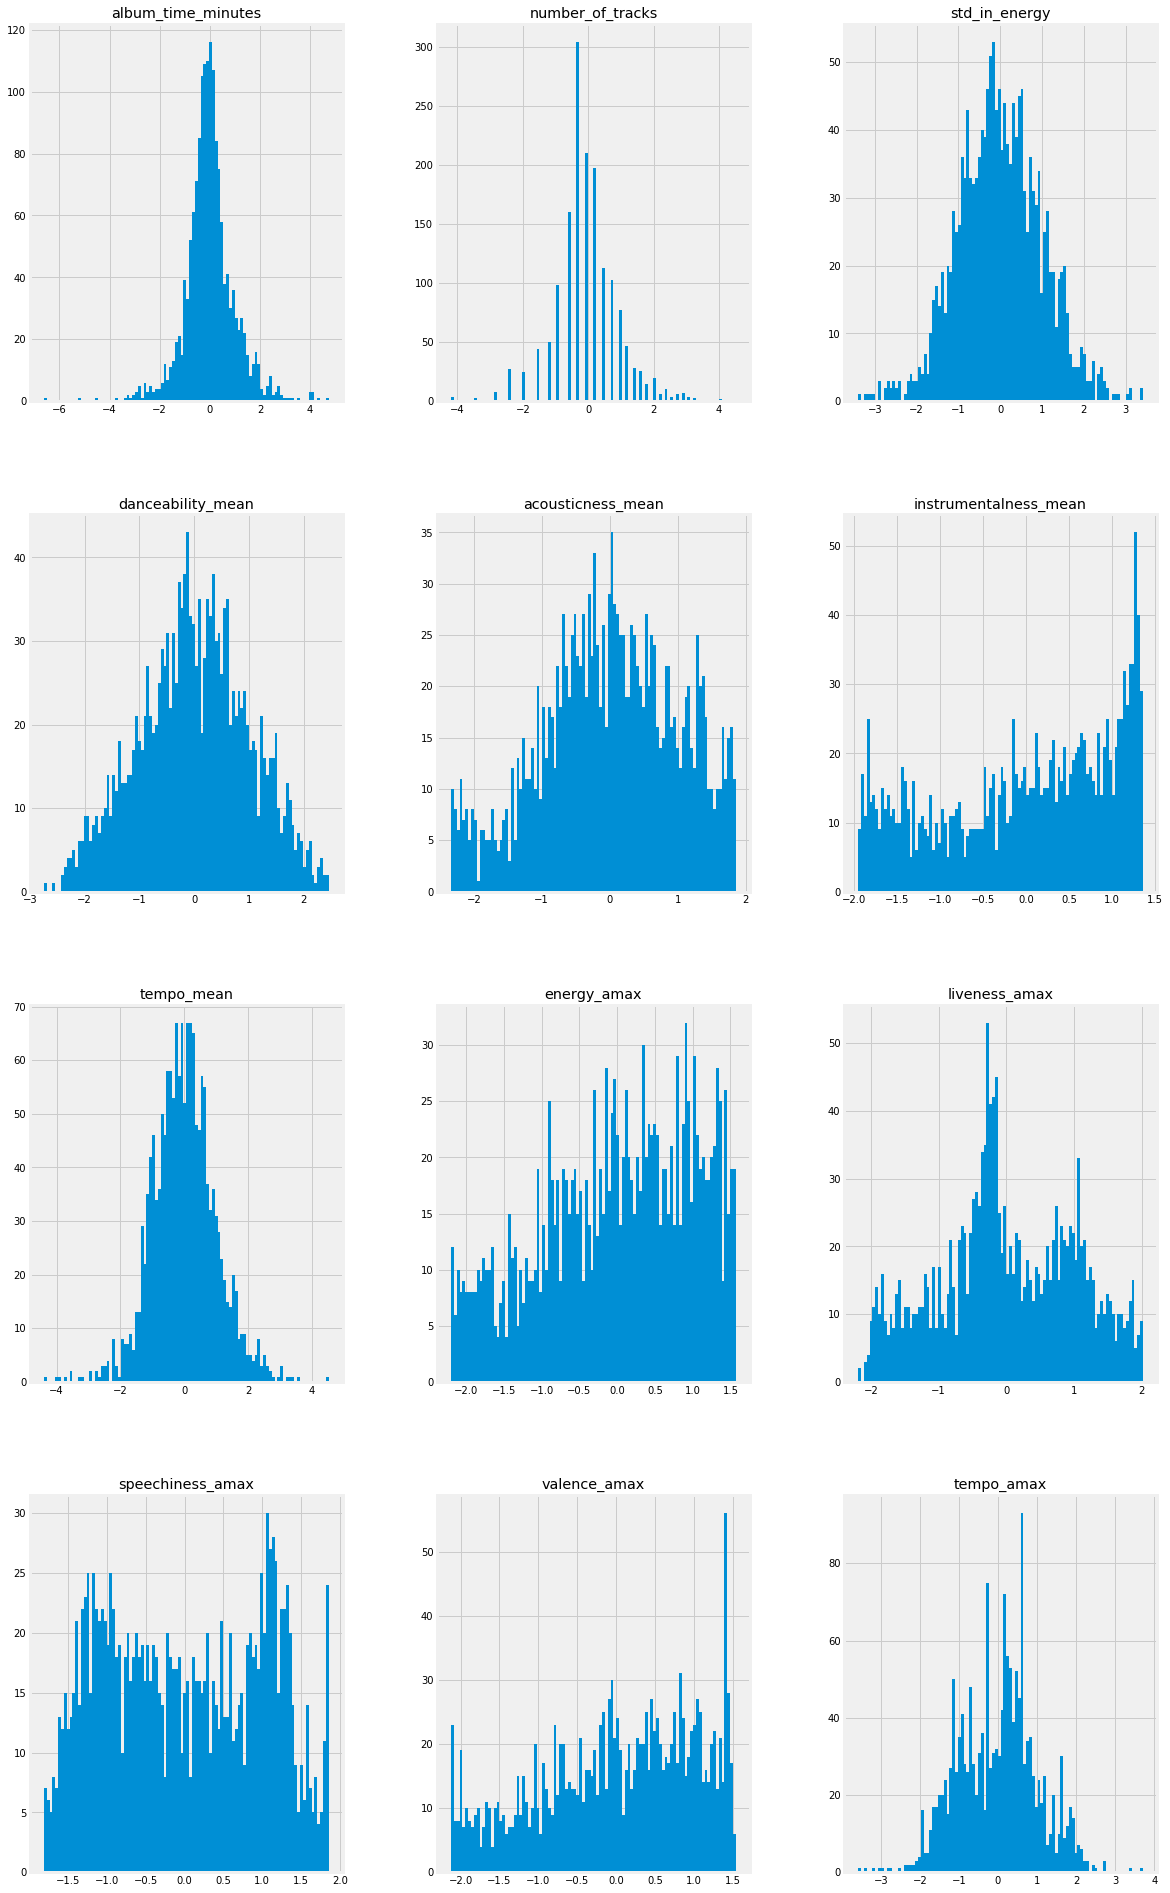

In [337]:
#identify data that needs to be scaled or transformed
fig, axes = plt.subplots(len(box_data_df.columns)//3, 3, figsize=(18, 34))

i = 0
for triaxis in axes:
    for axis in triaxis:
        box_data_df.hist(column = box_data_df.columns[i], bins = 100, ax=axis)
        i = i+1

In [ ]:
box_data_df

### Feature Engineering

In [383]:
df_fin = pd.concat([box_data_df, gen_dummies, explicit_dummies, mode_dummies, key_dummies,
                    signature_dummies], axis=1)

In [373]:
df_fin.head()

,album_time_minutes,number_of_tracks,std_in_energy,danceability_mean,acousticness_mean,instrumentalness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,popularity_amax,num_markets_amax,genre_ElectronicRock,genre_Experimental,genre_ExperimentalElectronic,genre_ExperimentalRock,genre_Folk_Country,genre_Global,genre_Jazz,genre_Metal,genre_Pop_RnB,genre_Rap,genre_Rock,explicit_True,mode_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,signature_4,signature_5
007DWn799UWvfY1wwZeENR,0.613094,0.948646,-1.426532,2.301533,-1.320892,-1.645117,0.536908,-0.777003,0.204579,1.363353,1.413524,0.321913,1.776228,0.408761,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
00ojDEHvnEOPOjhHrUrKy5,0.427064,-0.304464,0.562332,1.347114,0.336346,0.915778,-1.429246,-0.766014,1.744347,0.026039,0.874587,-1.902063,-1.849178,0.408761,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
00oz3t7cI3WfwS2oEIZD6x,-1.204757,-0.591849,-1.403372,-0.433243,1.786279,0.299950,-0.070333,-2.086877,-1.526193,-1.211423,-1.522015,2.046714,0.310799,-2.784296,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
00uqjqwLruO346z3cNlNqG,-0.213950,0.478102,0.866081,0.311019,0.614932,-0.892465,0.424759,0.737878,0.678676,0.426043,0.356535,1.836885,1.219692,0.408761,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
01ey0ETPITd3jiOiztRXzK,0.378283,1.171744,-0.156295,-0.845067,0.439611,-0.385894,-1.037573,-0.766014,-0.266177,-0.998364,-0.793481,0.724226,-2.111899,0.408761,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0


In [452]:
#interaction terms
df_fin['song_length'] = df_fin['album_time_minutes'] * df_fin['number_of_tracks']
df_fin['album_fun'] = df_fin['danceability_mean'] * df_fin['valence_amax']
df_fin['human'] = df_fin['instrumentalness_mean'] * df_fin['speechiness_amax']

### Ridge and Lasso regression with all variables

In [453]:
df_fin.fillna(method = 'ffill', inplace=True)

In [454]:
y = score
X = df_fin.drop(['Score_amax'], axis=1)

In [455]:
#perform train test split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [456]:
#fit models
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [457]:
# Generate preditions for training and test sets
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)

y_h_lasso_train = lasso.predict(X_train)
y_h_lasso_test = lasso.predict(X_test)

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [458]:
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

Train Error Ridge Model 941.8661720424525
Test Error Ridge Model 519.7476539509613


Train Error Lasso Model 1020.9069411617269
Test Error Lasso Model 540.4357229112637


Train Error Unpenalized Linear Model 940.4895100793055
Test Error Unpenalized Linear Model 526.316110241003


In [459]:
print('Ridge parameter coefficients:', ridge.coef_)
print('Lasso parameter coefficients:', lasso.coef_)
print('Linear model parameter coefficients:', lin.coef_)

Ridge parameter coefficients: [ 4.63720090e-04 -2.11360707e-02 -4.79386795e-01  2.67631143e-02
 -2.49701661e-01 -5.35375258e-03 -1.71878151e+00 -5.59905384e-02
 -1.21578476e-01 -5.31712393e-02 -2.09955764e-04  5.49242331e-01
  1.23903344e-01  1.49508145e-01  4.72513011e-02  1.65354865e-03
  1.96579489e-04  3.70049190e-03  1.70503771e-01  4.36539563e-02
 -4.29298658e-03  1.99844959e-01  2.41784549e-01  2.50249114e-01
  3.49976762e-01  5.32502533e-02 -4.64583798e-02  8.15184031e-02
  5.38066909e-02 -1.14611262e-01 -4.64479784e-01  0.00000000e+00
  0.00000000e+00 -1.76804968e-01  1.32013187e-01  2.10896997e-01
  4.04989327e-01  1.66276804e-01  7.73767321e-02  6.11677230e-02
  1.61993834e-01  1.21869486e-01  1.56383923e-01  3.26364891e-04
  7.16822692e-01  2.60156624e-01]
Lasso parameter coefficients: [ 0.00129664 -0.          0.          0.         -0.          0.
 -0.          0.          0.         -0.00346946 -0.         -0.
  0.         -0.         -0.         -0.         -0.00381125 

In [460]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_h_ridge_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_h_ridge_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_h_ridge_test)))

Mean Absolute Error: 0.7283603402051176
Mean Squared Error: 1.0783146347530317
Root Mean Squared Error: 1.0384192962156624


In [461]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_h_lin_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_h_lin_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_h_lin_test)))

Mean Absolute Error: 0.7347460722857768
Mean Squared Error: 1.0919421374294669
Root Mean Squared Error: 1.0449603520849329


Text(0, 0.5, 'Feature')

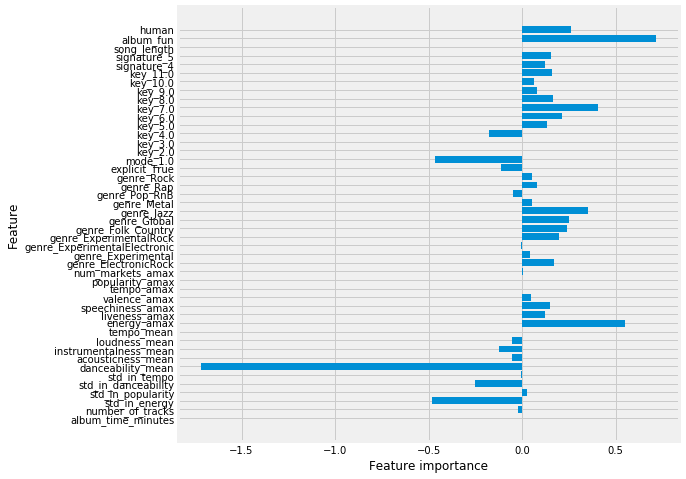

In [462]:
#feature importances
n_features = X_train.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), ridge.coef_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')

### Ridge and Lasso regression with few variables